In [1]:
# Import des librairies
import pandas as pd       
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path

C:\Users\Julien\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Julien\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Julien\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Julien\anaconda3\envs\myenv\lib\site-packages\tensorflow\pyth

In [2]:
# chemin du dossier global
dir_alldata = Path('../chest_xray')

# chemin du dossier des données d'entrainement 
train_data_dir = dir_alldata / 'train'

# chemin du dossier des données de validation
validation_data_dir = dir_alldata / 'val'

# chemin du dossier des données de test
test_data_dir = dir_alldata / 'test'

# tri entre les données normal et les données présentant une pneumonie
normal_cases_train = train_data_dir / 'NORMAL'
pneumonia_cases_train = train_data_dir / 'PNEUMONIA'

In [3]:
# Normalisation des données redimension etc 
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 30
batch_size = 20

if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height)
else:
    input_shape =(img_width, img_height,3)
    
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_set= train_datagen.flow_from_directory(train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_set = validation_datagen.flow_from_directory(validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_set = test_datagen.flow_from_directory(test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
# réalisation d'un réseaux de neurones à convolution 

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# affichage des parametre du model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [6]:
# compilation du model
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# entrainement du model
history = model.fit_generator(train_set, steps_per_epoch=nb_train_sample//batch_size, epochs=epochs,validation_data=validation_set, validation_steps=nb_validation_samples//batch_size)

Epoch 1/30
50/50 [==============================] - 43s 852ms/step - loss: 0.6010 - acc: 0.7270 - val_loss: 0.8024 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 37s 738ms/step - loss: 0.5265 - acc: 0.7680 - val_loss: 0.9445 - val_acc: 0.6000
Epoch 3/30
50/50 [==============================] - 33s 665ms/step - loss: 0.3207 - acc: 0.8594 - val_loss: 1.3076 - val_acc: 0.6500
Epoch 4/30
50/50 [==============================] - 31s 615ms/step - loss: 0.2993 - acc: 0.8630 - val_loss: 0.8971 - val_acc: 0.7000
Epoch 5/30
50/50 [==============================] - 30s 607ms/step - loss: 0.2939 - acc: 0.8820 - val_loss: 0.6443 - val_acc: 0.7500
Epoch 6/30
50/50 [==============================] - 34s 688ms/step - loss: 0.2896 - acc: 0.8700 - val_loss: 0.5896 - val_acc: 0.8250
Epoch 7/30
50/50 [==============================] - 30s 606ms/step - loss: 0.2795 - acc: 0.8810 - val_loss: 0.5410 - val_acc: 0.7500
Epoch 8/30
50/50 [==============================] - 31s 616ms/step - 

In [8]:
# Evalution du model avec les données de test et de validation
test_accuracy = model.evaluate_generator(test_set)
val_accuracy = model.evaluate_generator(validation_set)

In [9]:
# Affichage des resultats
print('The accuracy on test set :',test_accuracy[1]*100 )
print('The accuracy on validation set :',val_accuracy[1]*100 )

The accuracy on test set : 80.44871687889099
The accuracy on validation set : 68.75


<AxesSubplot:>

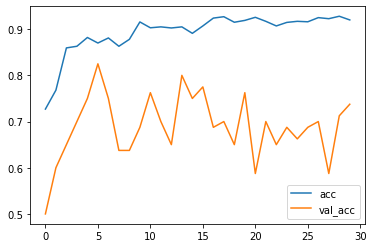

In [10]:
losses = pd.DataFrame(model.history.history)
losses[['acc', 'val_acc']].plot()